In [32]:
import numpy as np
import matplotlib.pyplot as plt

import xarray as xr

In [33]:
data4 = xr.open_dataset("PSI_non_dim_full_form_low_res.nc")

In [34]:
a1 = np.array([-1,0,1,2])
a2 = np.ones(len(a1))
np.heaviside((a1-a2),1)

array([0., 0., 1., 1.])

In [35]:
N_list = [(1*10**(-5))**(0.5)]  # np.linspace((1e-7)**(0.5),(8e-4)**(0.5),51)  # np.array([(1e-5)**(0.5)])  # stratification
theta = 5*10**(-3)
delta_list = [0.5]  # np.linspace(0, 1, 26)
f = 10**(-4)
S2 = N_list[0]**2*theta**2/f**2
gm = (1+S2)**(-1)
beta = (1 + S2)**(-0.5)
Gshear = N_list[0]**2*theta*gm/f
Ri = N_list[0]**2*(1-gm)/Gshear**2
H_1 = f*0.05/(gm*N_list[0]**2*np.tan(theta))
Gshear/f

4.878048780487806

In [36]:
def vsz(t):
    return 1 + beta**(-2)*(np.cos(beta*t)-1)

In [37]:
def usz(t):
    return beta**(-1)*(np.sin(beta*t))

In [38]:
def bsz(t):
    return beta**(-2)*(np.cos(beta*t)-1)

In [39]:
data4.t

<xarray.DataArray 't' (t: 6)>
array([0.      , 1.241218, 2.482435, 3.723653, 4.96487 , 6.206088])
Coordinates:
  * t        (t) float64 0.0 1.241 2.482 3.724 4.965 6.206

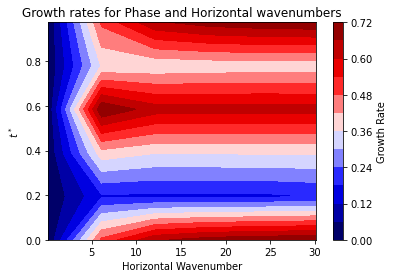

In [40]:
plt.contourf(data4.k, data4.t*beta/(2*np.pi), data4.growth_rate.isel(N=0, delta=0,gamma_index=0), cmap="seismic", levels=12)
plt.colorbar(label="Growth Rate")
plt.xlabel("Horizontal Wavenumber")
plt.ylabel("$t^*$")
plt.title("Growth rates for Phase and Horizontal wavenumbers")
plt.savefig("grwthrt_wv_nmbr_phs.pdf")
plt.show()

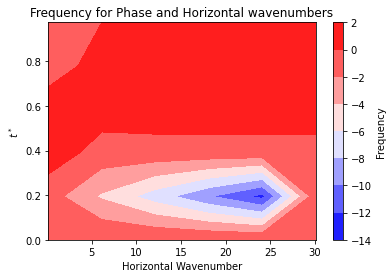

In [41]:
plt.contourf(data4.k,data4.t*beta/(2*np.pi), data4.oscillation.isel(N=0, gamma_index=0,delta=0),cmap="bwr")
plt.colorbar(label="Frequency")
plt.xlabel("Horizontal Wavenumber")
plt.ylabel("$t^*$")
plt.title("Frequency for Phase and Horizontal wavenumbers")
plt.savefig("frqncy_wv_nmbr_phs.pdf")
plt.show()

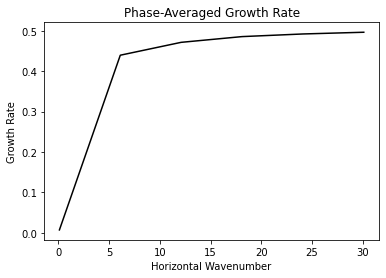

In [42]:
plt.plot(data4.k[:], data4.growth_rate.isel(N=0, delta=0,gamma_index=0).mean(['t'])[:],c="k")
plt.xlabel("Horizontal Wavenumber")
plt.ylabel("Growth Rate")
plt.title("Phase-Averaged Growth Rate")
plt.savefig("phs_avg_grwth_rt.pdf")
plt.show()

Text(0, 0.5, 'Growth Rate')

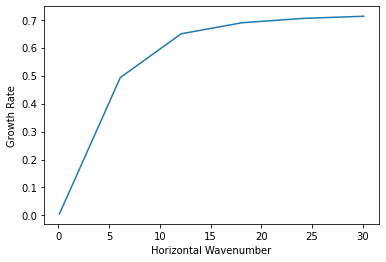

In [43]:
plt.plot(data4.k, data4.growth_rate.isel(N=0, delta=0,gamma_index=0, t=0))
plt.xlabel("Horizontal Wavenumber")
plt.ylabel("Growth Rate")

In [44]:
idx = data4.growth_rate.isel(N=0, delta=0,gamma_index=0).idxmax(dim="k")

In [45]:
data4.growth_rate.isel(N=0, delta=0,gamma_index=0).mean(['t']).idxmax()

<xarray.DataArray 'k' ()>
array(30.1)
Coordinates:
    N            float64 0.003162
    delta        float64 -0.5
    gamma_index  float64 0.0

In [46]:
data5 = xr.open_dataset("PSI_non_dim_field_low_res.nc")

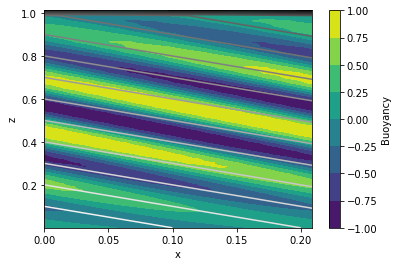

In [52]:
ti = 5
i = 30 #data4.growth_rate.isel(N=0, delta=0,gamma_index=0).mean(['t']).idxmax()
w = 65
nz = 128
delta = 0.5
theta = 10**(-3)
f = 10**(-4)
N = (10**(-5))**(0.5)
S2 = N**2*theta**2/f**2
fstar = f*(1+S2)**(0.5)
gm = (1+S2)**(-1)
lmbd = N**2*theta*gm/f
coeff = delta*lmbd*theta*f/(fstar**2)

v = data5.u_structure.isel(t=ti,z=np.arange(0,w,1)).sel(k=i, method="nearest")
b = data5.b_b.isel(t=ti,z=np.arange(0,w,1)).sel(k=i, method="nearest")
z = np.array([data5.z]).T*np.ones((nz, nz))
Hv = np.heaviside(1-z, 1)
vp = vsz(data5.t[ti].values)
bp = bsz(data5.t[ti].values)
x = np.array([data5.x_domain.isel(t=ti).sel(k=i, method="nearest").values])*np.ones((nz, nz))
plt.contourf( data5.x_domain.isel(t=ti).sel(k=i,method="nearest"), np.array(data5.z)[:w], v)
plt.colorbar(label="Buoyancy")
plt.contour( data5.x_domain.isel(t=ti).sel(k=i,method="nearest"), np.array(data5.z)[:w], b, cmap = "binary",levels=20)
# plt.title("v-velocity structure at $t^*$ = "+str(round(np.array(data5.t[ti])*beta/(2*np.pi),2)))
plt.ylabel("z")
plt.xlabel("x")
# plt.contour(data5.x_domain.isel(t=q).sel(k=i,method="nearest"), np.array(data5.z), data5.b_structure.isel(t=q).sel(k=i,method="nearest"),cmap="gray")
plt.show()

In [ ]:
data5.t[2]

In [ ]:
ti = 1

i = 3.1 #data4.growth_rate.isel(N=0, delta=0,gamma_index=0).mean(['t']).idxmax()

nz = 64
delta = 0.5
theta = 10**(-3)
f = 10**(-4)
N = (10**(-5))**(0.5)
S2 = N**2*theta**2/f**2
fstar = f*(1+S2)**(0.5)
gm = (1+S2)**(-1)
lmbd = N**2*theta*gm/f
coeff = delta*lmbd*theta*f/(fstar**2)

v = data5.v_b.isel(t=ti).sel(k=i,x=0, method="nearest").T*gm**(-0.5)
b = data5.b_b.isel(t=ti).sel(k=i, method="nearest")
z = np.array([data5.z]).T*np.ones((nz, nz))
Hv = np.heaviside(1-z, 1)
vp = vsz(data5.t[ti].values)
bp = bsz(data5.t[ti].values)
x = np.array([data5.x_domain.isel(t=ti).sel(k=i, method="nearest").values])*np.ones((nz, nz))
# plt.plot(np.array(data5.z), b)
plt.contour( data5.x_domain.isel(t=ti).sel(k=i,method="nearest"), np.array(data5.z), b, cmap = "binary")
plt.colorbar(label="v-velocity")

# plt.title("v-velocity structure at $t^*$ = "+str(round(np.array(data5.t[ti])*beta/(2*np.pi),2)))
plt.ylabel("z")
plt.xlabel("x")
# plt.contour(data5.x_domain.isel(t=q).sel(k=i,method="nearest"), np.array(data5.z), data5.b_structure.isel(t=q).sel(k=i,method="nearest"),cmap="gray")
plt.show()

In [ ]:
b.isel(z=49)

In [ ]:
ti = 5
i = 3#data4.growth_rate.isel(N=0, delta=0,gamma_index=0).mean(['t']).idxmax()

nz = 64
delta = 0.5
theta = 10**(-3)
f = 10**(-4)
N = (10**(-5))**(0.5)
S2 = N**2*theta**2/f**2
fstar = f*(1+S2)**(0.5)
gm = (1+S2)**(-1)
lmbd = N**2*theta*gm/f
coeff = delta*lmbd*theta*f/(fstar**2)

v = data5.u_structure.isel(t=ti).sel(k=i, method="nearest")
b = data5.b_b.isel(t=ti).sel(k=i, method="nearest")
z = np.array([data5.z]).T*np.ones((nz, nz))
Hv = np.heaviside(1-z, 1)
vp = vsz(data5.t[ti].values)
bp = bsz(data5.t[ti].values)
x = np.array([data5.x_domain.isel(t=ti).sel(k=i, method="nearest").values])*np.ones((nz, nz))
plt.contourf( data5.x_domain.isel(t=ti).sel(k=i,method="nearest"), np.array(data5.z), v)
plt.colorbar(label="v-velocity")
plt.contour( data5.x_domain.isel(t=ti).sel(k=i,method="nearest"), np.array(data5.z), b, cmap = "binary")
plt.title("v-velocity structure at $t^*$ = "+str(round(np.array(data5.t[ti])*beta/(2*np.pi),2)))
plt.ylabel("z")
plt.xlabel("x")
# plt.contour(data5.x_domain.isel(t=q).sel(k=i,method="nearest"), np.array(data5.z), data5.b_structure.isel(t=q).sel(k=i,method="nearest"),cmap="gray")
plt.show()

In [ ]:
import matplotlib.animation
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams["animation.html"] = "jshtml"
plt.rcParams['animation.embed_limit'] = 2**128
# plt.rcParams['figure.dpi'] = 150  
plt.ioff()
nz = 64
delta = 0.5
theta = 10**(-3)
f = 10**(-4)
N = (10**(-5))**(0.5)
S2 = N**2*theta**2/f**2
fstar = f*(1+S2)**(0.5)
gm = (1+S2)**(-1)
lmbd = N**2*theta*gm/f
coeff = delta*lmbd*theta*f/(fstar**2)
fig, axs = plt.subplots()
x_domain = np.linspace(0, 2*np.pi/4, nz)

def animate(ti):
    plt.clf()
    i = data4.growth_rate.isel(N=0, delta=0,gamma_index=0).mean(['t']).idxmax()
    u = data5.u_structure.isel(t=ti).sel(k=i, method="nearest")
    b = data5.b_structure.isel(t=ti).sel(k=i, method="nearest")
    z = np.array([data5.z]).T*np.ones((nz, nz))
    Hv = np.heaviside(1-z, 1)
    up = usz(data5.t[ti].values)
    bp = bsz(data5.t[ti].values)
    x = np.array([data5.x_domain.isel(t=ti).sel(k=i, method="nearest").values])*np.ones((nz, nz))
    plt.contourf( data5.x_domain.isel(t=ti).sel(k=i,method="nearest"), np.array(data5.z), u+delta*up*Hv*(1-z))
    plt.colorbar(label="u-velocity")
    plt.contour( data5.x_domain.isel(t=ti).sel(k=i,method="nearest"), np.array(data5.z), b+theta*x+z+gm*(1-z)*Hv+coeff*bp*Hv*(1-z), cmap = "binary")
    plt.title("u-velocity structure at $t^*$ = "+str(round(np.array(data5.t[ti])*beta/(2*np.pi),2)))
    plt.ylabel("z")
    plt.xlabel("x")

frms = len(data5.t)
anim = matplotlib.animation.FuncAnimation(fig, animate, frames=frms, interval=1000)
# writervideo = matplotlib.animation.FFMpegWriter(fps=0.5) 
anim.save('PSI_u_structure_fastest_mode.gif') 
plt.close()
# anim.show()

In [ ]:
import matplotlib.animation
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams["animation.html"] = "jshtml"
plt.rcParams['animation.embed_limit'] = 2**128
# plt.rcParams['figure.dpi'] = 150  
plt.ioff()
nz = 64
delta = 0.5
theta = 10**(-3)
f = 10**(-4)
N = (10**(-5))**(0.5)
S2 = N**2*theta**2/f**2
fstar = f*(1+S2)**(0.5)
gm = (1+S2)**(-1)
lmbd = N**2*theta*gm/f
coeff = delta*lmbd*theta*f/(fstar**2)
fig, axs = plt.subplots()
x_domain = np.linspace(0, 2*np.pi/4, nz)

def animate(ti):
    plt.clf()
    i = data4.growth_rate.isel(N=0, delta=0,gamma_index=0).mean(['t']).idxmax()
    v = data5.v_structure.isel(t=ti).sel(k=i, method="nearest")
    b = data5.b_structure.isel(t=ti).sel(k=i, method="nearest")
    z = np.array([data5.z]).T*np.ones((nz, nz))
    Hv = np.heaviside(1-z, 1)
    vp = vsz(data5.t[ti].values)
    bp = bsz(data5.t[ti].values)
    x = np.array([data5.x_domain.isel(t=ti).sel(k=i, method="nearest").values])*np.ones((nz, nz))
    plt.contourf( data5.x_domain.isel(t=ti).sel(k=i,method="nearest"), np.array(data5.z), v+1-Hv*(1-z)+delta*vp*Hv*(1-z))
    plt.colorbar(label="v-velocity")
    plt.contour( data5.x_domain.isel(t=ti).sel(k=i,method="nearest"), np.array(data5.z), b+theta*x+z+gm*(1-z)*Hv+coeff*bp*Hv*(1-z), cmap = "binary")
    plt.title("v-velocity structure at $t^*$ = "+str(round(np.array(data5.t[ti])*beta/(2*np.pi),2)))
    plt.ylabel("z")
    plt.xlabel("x")

frms = len(data5.t)
anim = matplotlib.animation.FuncAnimation(fig, animate, frames=frms, interval=1000)
# writervideo = matplotlib.animation.FFMpegWriter(fps=0.5) 
anim.save('PSI_v_structure_fastest_mode.gif') 
plt.close()
# anim.show()

In [ ]:
import matplotlib.animation
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams["animation.html"] = "jshtml"
plt.rcParams['animation.embed_limit'] = 2**128
# plt.rcParams['figure.dpi'] = 150  
plt.ioff()
nz = 64
delta = 0.5
theta = 10**(-3)
f = 10**(-4)
N = (10**(-5))**(0.5)
S2 = N**2*theta**2/f**2
fstar = f*(1+S2)**(0.5)
gm = (1+S2)**(-1)
lmbd = N**2*theta*gm/f
coeff = delta*lmbd*theta*f/(fstar**2)
fig, axs = plt.subplots()
x_domain = np.linspace(0, 2*np.pi/4, nz)

def animate(ti):
    plt.clf()
    i = data4.growth_rate.isel(N=0, delta=0,gamma_index=0).mean(['t']).idxmax()
    w = data5.w_structure.isel(t=ti).sel(k=i, method="nearest")
    b = data5.b_structure.isel(t=ti).sel(k=i, method="nearest")
    z = np.array([data5.z]).T*np.ones((nz, nz))
    Hv = np.heaviside(1-z, 1)
    bp = bsz(data5.t[ti].values)
    x = np.array([data5.x_domain.isel(t=ti).sel(k=i, method="nearest").values])*np.ones((nz, nz))
    plt.contourf( data5.x_domain.isel(t=ti).sel(k=i,method="nearest"), np.array(data5.z), w)
    plt.colorbar(label="w-velocity")
    plt.contour( data5.x_domain.isel(t=ti).sel(k=i,method="nearest"), np.array(data5.z), b+theta*x+z+gm*(1-z)*Hv+coeff*bp*Hv*(1-z), cmap = "binary")
    plt.title("w-velocity structure at $t^*$ = "+str(round(np.array(data5.t[ti])*beta/(2*np.pi),2)))
    plt.ylabel("z")
    plt.xlabel("x")

frms = len(data5.t)
anim = matplotlib.animation.FuncAnimation(fig, animate, frames=frms, interval=1000)
# writervideo = matplotlib.animation.FFMpegWriter(fps=0.5) 
anim.save('PSI_w_structure_fastest_mode.gif') 
plt.close()
# anim.show()

In [ ]:
import matplotlib.animation
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams["animation.html"] = "jshtml"
plt.rcParams['animation.embed_limit'] = 2**128
# plt.rcParams['figure.dpi'] = 150  
plt.ioff()
nz = 64
delta = 0.5
theta = 10**(-3)
f = 10**(-4)
N = (10**(-5))**(0.5)
S2 = N**2*theta**2/f**2
fstar = f*(1+S2)**(0.5)
gm = (1+S2)**(-1)
lmbd = N**2*theta*gm/f
coeff = delta*lmbd*theta*f/(fstar**2)
fig, axs = plt.subplots()

def animate(ti):
    plt.clf()
    i = idx[ti]
    u = data5.u_structure.isel(t=ti).sel(k=i, method="nearest")
    b = data5.b_structure.isel(t=ti).sel(k=i, method="nearest")
    z = np.array([data5.z]).T*np.ones((nz, nz))
    Hv = np.heaviside(1-z, 1)
    up = usz(data5.t[ti].values)
    bp = bsz(data5.t[ti].values)
    x = np.array([data5.x_domain.isel(t=ti).sel(k=i, method="nearest").values])*np.ones((nz, nz))
    plt.contourf( data5.x_domain.isel(t=ti).sel(k=i,method="nearest"), np.array(data5.z), u+delta*up*Hv*(1-z))
    plt.colorbar(label="u-velocity")
    plt.contour( data5.x_domain.isel(t=ti).sel(k=i,method="nearest"), np.array(data5.z), b+theta*x+z+gm*(1-z)*Hv+coeff*bp*Hv*(1-z), cmap = "binary")
    plt.title("u-velocity structure at $t^*$ = "+str(round(np.array(data5.t[ti])*beta/(2*np.pi),2)))
    plt.ylabel("z")
    plt.xlabel("x")

frms = len(data5.t)
anim = matplotlib.animation.FuncAnimation(fig, animate, frames=frms, interval=1000)
# writervideo = matplotlib.animation.FFMpegWriter(fps=0.5) 
anim.save('PSI_u_structure_fastest_mode_each_time.gif') 
plt.close()
# anim.show()

In [ ]:
import matplotlib.animation
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams["animation.html"] = "jshtml"
plt.rcParams['animation.embed_limit'] = 2**128
# plt.rcParams['figure.dpi'] = 150  
plt.ioff()
nz = 64
delta = 0.5
theta = 10**(-3)
f = 10**(-4)
N = (10**(-5))**(0.5)
S2 = N**2*theta**2/f**2
fstar = f*(1+S2)**(0.5)
gm = (1+S2)**(-1)
lmbd = N**2*theta*gm/f
coeff = delta*lmbd*theta*f/(fstar**2)
fig, axs = plt.subplots()

def animate(ti):
    plt.clf()
    i = idx[ti]
    v = data5.v_structure.isel(t=ti).sel(k=i, method="nearest")
    b = data5.b_structure.isel(t=ti).sel(k=i, method="nearest")
    z = np.array([data5.z]).T*np.ones((nz, nz))
    Hv = np.heaviside(1-z, 1)
    vp = vsz(data5.t[ti].values)
    bp = bsz(data5.t[ti].values)
    x = np.array([data5.x_domain.isel(t=ti).sel(k=i, method="nearest").values])*np.ones((nz, nz))
    plt.contourf( data5.x_domain.isel(t=ti).sel(k=i,method="nearest"), np.array(data5.z), v+1-Hv*(1-z)+delta*vp*Hv*(1-z))
    plt.colorbar(label="v-velocity")
    plt.contour( data5.x_domain.isel(t=ti).sel(k=i,method="nearest"), np.array(data5.z), b+theta*x+z+gm*(1-z)*Hv+coeff*bp*Hv*(1-z), cmap = "binary")
    plt.title("v-velocity structure at $t^*$ = "+str(round(np.array(data5.t[ti])*beta/(2*np.pi),2)))
    plt.ylabel("z")
    plt.xlabel("x")

frms = len(data5.t)
anim = matplotlib.animation.FuncAnimation(fig, animate, frames=frms, interval=1000)
# writervideo = matplotlib.animation.FFMpegWriter(fps=0.5) 
anim.save('PSI_v_structure_fastest_mode_each_time.gif') 
plt.close()
# anim.show()

In [ ]:
import matplotlib.animation
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams["animation.html"] = "jshtml"
plt.rcParams['animation.embed_limit'] = 2**128
# plt.rcParams['figure.dpi'] = 150  
plt.ioff()
nz = 64
delta = 0.5
theta = 10**(-3)
f = 10**(-4)
N = (10**(-5))**(0.5)
S2 = N**2*theta**2/f**2
fstar = f*(1+S2)**(0.5)
gm = (1+S2)**(-1)
lmbd = N**2*theta*gm/f
coeff = delta*lmbd*theta*f/(fstar**2)
fig, axs = plt.subplots()

def animate(ti):
    plt.clf()
    i = idx[ti]
    w = data5.w_structure.isel(t=ti).sel(k=i, method="nearest")
    b = data5.b_structure.isel(t=ti).sel(k=i, method="nearest")
    z = np.array([data5.z]).T*np.ones((nz, nz))
    Hv = np.heaviside(1-z, 1)
    bp = bsz(data5.t[ti].values)
    x = np.array([data5.x_domain.isel(t=ti).sel(k=i, method="nearest").values])*np.ones((nz, nz))
    plt.contourf( data5.x_domain.isel(t=ti).sel(k=i,method="nearest"), np.array(data5.z), w)
    plt.colorbar(label="w-velocity")
    plt.contour( data5.x_domain.isel(t=ti).sel(k=i,method="nearest"), np.array(data5.z), b+theta*x+z+gm*(1-z)*Hv+coeff*bp*Hv*(1-z), cmap = "binary")
    plt.title("w-velocity structure at $t^*$ = "+str(round(np.array(data5.t[ti])*beta/(2*np.pi),2)))
    plt.ylabel("z")
    plt.xlabel("x")

frms = len(data5.t)
anim = matplotlib.animation.FuncAnimation(fig, animate, frames=frms, interval=1000)
# writervideo = matplotlib.animation.FFMpegWriter(fps=0.5) 
anim.save('PSI_w_structure_fastest_mode_each_time.gif') 
plt.close()
# anim.show()

In [ ]:
import matplotlib.animation
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams["animation.html"] = "jshtml"
plt.rcParams['animation.embed_limit'] = 2**128
# plt.rcParams['figure.dpi'] = 150  
plt.ioff()
nz = 64
delta = 0.5
theta = 10**(-3)
f = 10**(-4)
N = (10**(-5))**(0.5)
S2 = N**2*theta**2/f**2
fstar = f*(1+S2)**(0.5)
gm = (1+S2)**(-1)
lmbd = N**2*theta*gm/f
coeff = delta*lmbd*theta*f/(fstar**2)
fig, axs = plt.subplots()
x_domain = np.linspace(0, 2*np.pi/4, nz)

def animate(ti):
    plt.clf()
    idx2 = np.unique(idx)
    u = 0
    b = 0
    for i in idx2:
        u += data5.u_structure.isel(t=ti).sel(k=i, method="nearest")
        b += data5.b_structure.isel(t=ti).sel(k=i, method="nearest")
    u_max = np.max(u)
    u = u/u_max
    b_max = np.max(b)
    b = b/b_max
    z = np.array([data5.z]).T*np.ones((nz, nz))
    Hv = np.heaviside(1-z, 1)
    up = usz(data5.t[ti].values)
    bp = bsz(data5.t[ti].values)
    x = np.array([data5.x_domain.isel(t=ti).sel(k=idx2[-1], method="nearest").values])*np.ones((nz, nz))
    plt.contourf(data5.x_domain.isel(t=ti).sel(k=idx2[-1],method="nearest"), np.array(data5.z), u+delta*up*Hv*(1-z))
    plt.colorbar(label="u-velocity")
    plt.contour( data5.x_domain.isel(t=ti).sel(k=idx2[-1],method="nearest"), np.array(data5.z), b+theta*x+z+gm*(1-z)*Hv+coeff*bp*Hv*(1-z), cmap = "binary")
    plt.title("u-velocity structure at $t^*$ = "+str(round(np.array(data5.t[ti])*beta/(2*np.pi),2)))
    plt.ylabel("z")
    plt.xlabel("x")

frms = len(data5.t)
anim = matplotlib.animation.FuncAnimation(fig, animate, frames=frms, interval=1000)
# writervideo = matplotlib.animation.FFMpegWriter(fps=0.5)
anim.save('PSI_u_structure_sum.gif') 
plt.close()
# anim.show()

In [ ]:
import matplotlib.animation
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams["animation.html"] = "jshtml"
plt.rcParams['animation.embed_limit'] = 2**128
# plt.rcParams['figure.dpi'] = 150  
plt.ioff()
nz = 64
delta = 0.5
theta = 10**(-3)
f = 10**(-4)
N = (10**(-5))**(0.5)
S2 = N**2*theta**2/f**2
fstar = f*(1+S2)**(0.5)
gm = (1+S2)**(-1)
lmbd = N**2*theta*gm/f
coeff = delta*lmbd*theta*f/(fstar**2)
fig, axs = plt.subplots()
x_domain = np.linspace(0, 2*np.pi/4, nz)

def animate(ti):
    plt.clf()
    idx2 = np.unique(idx)
    w = 0
    b = 0
    for i in idx2:
        w += data5.w_structure.isel(t=ti).sel(k=i, method="nearest")
        b += data5.b_structure.isel(t=ti).sel(k=i, method="nearest")
    w_max = np.max(w)
    w = w/w_max
    b_max = np.max(b)
    b = b/b_max
    z = np.array([data5.z]).T*np.ones((nz, nz))
    Hv = np.heaviside(1-z, 1)
    bp = bsz(data5.t[ti].values)
    x = np.array([data5.x_domain.isel(t=ti).sel(k=idx2[-1], method="nearest").values])*np.ones((nz, nz))
    plt.contourf(data5.x_domain.isel(t=ti).sel(k=idx2[-1],method="nearest"), np.array(data5.z), w)
    plt.colorbar(label="w-velocity")
    plt.contour( data5.x_domain.isel(t=ti).sel(k=idx2[-1],method="nearest"), np.array(data5.z), b+theta*x+z+gm*(1-z)*Hv+coeff*bp*Hv*(1-z), cmap = "binary")
    plt.title("w-velocity structure at $t^*$ = "+str(round(np.array(data5.t[ti])*beta/(2*np.pi),2)))
    plt.ylabel("z")
    plt.xlabel("x")

frms = len(data5.t)
anim = matplotlib.animation.FuncAnimation(fig, animate, frames=frms, interval=1000)
# writervideo = matplotlib.animation.FFMpegWriter(fps=0.5)
anim.save('PSI_w_structure_sum.gif') 
plt.close()
# anim.show()

In [ ]:
import matplotlib.animation
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams["animation.html"] = "jshtml"
plt.rcParams['animation.embed_limit'] = 2**128
# plt.rcParams['figure.dpi'] = 150  
plt.ioff()
nz = 64
delta = 0.5
theta = 10**(-3)
f = 10**(-4)
N = (10**(-5))**(0.5)
S2 = N**2*theta**2/f**2
fstar = f*(1+S2)**(0.5)
gm = (1+S2)**(-1)
lmbd = N**2*theta*gm/f
coeff = delta*lmbd*theta*f/(fstar**2)
fig, axs = plt.subplots()
x_domain = np.linspace(0, 2*np.pi/4, nz)

def animate(ti):
    plt.clf()
    idx2 = np.unique(idx)
    v = 0
    b = 0
    for i in idx2:
        v += data5.v_structure.isel(t=ti).sel(k=i, method="nearest")
        b += data5.b_structure.isel(t=ti).sel(k=i, method="nearest")
    v_max = np.max(v)
    v = v/v_max
    b_max = np.max(b)
    b = b/b_max
    z = np.array([data5.z]).T*np.ones((nz, nz))
    Hv = np.heaviside(1-z, 1)
    vp = vsz(data5.t[ti].values)
    bp = bsz(data5.t[ti].values)
    x = np.array([data5.x_domain.isel(t=ti).sel(k=idx2[-1], method="nearest").values])*np.ones((nz, nz))
    plt.contourf(data5.x_domain.isel(t=ti).sel(k=idx2[-1],method="nearest"), np.array(data5.z), v+1-Hv*(1-z)+delta*vp*Hv*(1-z))
    plt.colorbar(label="v-velocity")
    plt.contour( data5.x_domain.isel(t=ti).sel(k=idx2[-1],method="nearest"), np.array(data5.z), b+theta*x+z+gm*(1-z)*Hv+coeff*bp*Hv*(1-z), cmap = "binary")
    plt.title("v-velocity structure at $t^*$ = "+str(round(np.array(data5.t[ti])*beta/(2*np.pi),2)))
    plt.ylabel("z")
    plt.xlabel("x")

frms = len(data5.t)
anim = matplotlib.animation.FuncAnimation(fig, animate, frames=frms, interval=1000)
# writervideo = matplotlib.animation.FFMpegWriter(fps=0.5)
anim.save('PSI_v_structure_sum.gif') 
plt.close()
# anim.show()

In [ ]:
np.shape(np.array(x_domain))

In [ ]:
np.shape(x_domain)

In [ ]:
plt.pcolormesh(data5.z, data5.t*beta/(2*np.pi), data5.v_structure.isel(k=-1)/data5.v_structure.isel(k=-1).max())  # f/theta*S2*data5.z background shear
plt.ylabel("Time")
plt.xlabel("z")
plt.title("Largest Growing Mode Normalized Vertical Structure")
plt.colorbar()
# plt.xlabel("v-velocity")

In [ ]:
plt.plot(data5.z, data5.v_structure.isel(k=-1,t=6))

In [ ]:
plt.pcolormesh(data5.z, data5.t*beta/(2*np.pi), data5.v_structure.isel(k=-1)+data5.z-0.9*vsz(data5.t)*(1-data5.z))  # f/theta*S2*data5.z background shear
plt.ylabel("Time")
plt.colorbar()
# plt.xlabel("v-velocity")

In [ ]:
data5.v_structure.isel(k=14)